# things that need to be changed to code
- days --> need to be skipped on axes 
- grouping --> after changing to 3 different niacin concentrations, this needs to be represented in (different) graph
                    --> started with this but there's errors I can't resolve

Getting started: Loading packages and reading in the data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp
from scipy import stats

In [2]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

# Showing the data set (such as columns) and creating a new variable for the four groups

In [3]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [4]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.00,-1.0,50.9,-1.00,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56,-1.00,-1.0,50.4,-1.00,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.00,-1.0,50.5,-1.00,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.00,-1.0,50.5,-1.00,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.00,-1.0,50.9,-1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,B3128,female,experimental,experimental,2024-04-05,0.0,23.6,41.3,34.5,3.40,44.7,35.4,4.65,1
1340,B3129,female,control,control,2024-04-05,0.0,23.3,39.2,32.2,3.50,46.4,38.7,3.85,0
1341,B3130,female,control,control,2024-04-05,0.0,24.5,40.7,34,3.35,44.2,36.9,3.65,0
1342,B3131,female,experimental,experimental,2024-04-05,0.0,23.5,38.3,31.3,3.50,44.2,38.1,3.05,1


In [5]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today           object
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [6]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [7]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
       '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
       '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06',
       '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10',
       '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
       '2024-03-15', '2024-03-18', '2024-03-20', '2024-03-22',
       '2024-03-25', '2024-03-27', '2024-03-29', '2024-04-01',
       '2024-04-03', '2024-04-05'], dtype=object)

In [8]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,-1.000000,-1.0000,-1.000000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,2.887500,51.5000,9.012500,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,2.937500,51.2875,3.062500,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,2.987500,51.5250,3.000000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,3.362500,51.7500,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...
163,male,experimental,2024-03-27,1.5,28.7500,52.0000,2.906250,44.7000,2.625000,3.0
164,male,experimental,2024-03-29,1.5,29.2500,46.1875,2.956250,51.7750,2.962500,3.0
165,male,experimental,2024-04-01,1.5,29.6500,45.6875,2.795833,45.8500,2.491667,3.0
166,male,experimental,2024-04-03,1.5,29.5875,37.3000,2.900000,44.6125,2.687500,3.0


# Plotting the body mass, food intake, and water intake for the four groups

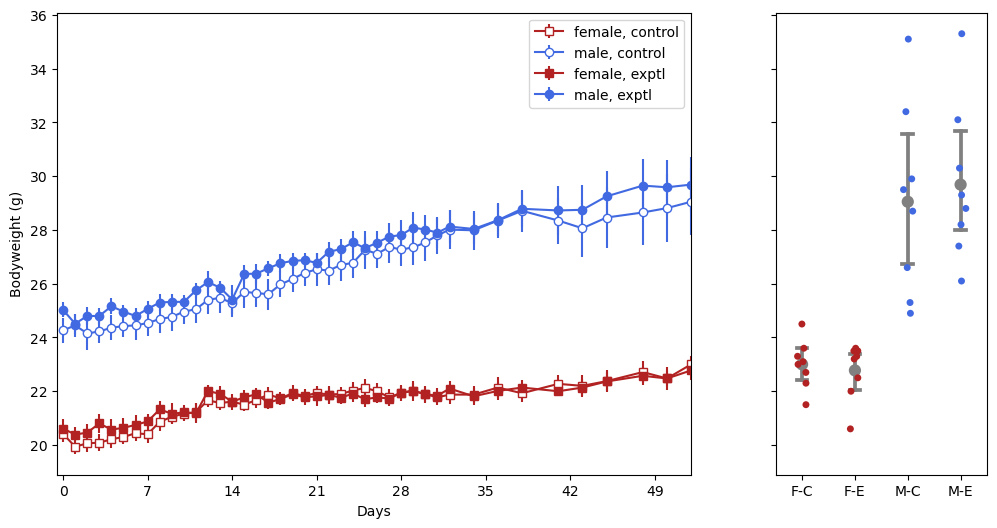

In [38]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50,52]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").bodyweight

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="firebrick",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="royalblue",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="s", markerfacecolor="firebrick", color="firebrick",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="royalblue", color="royalblue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,52])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["firebrick", "firebrick", "royalblue", "royalblue"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

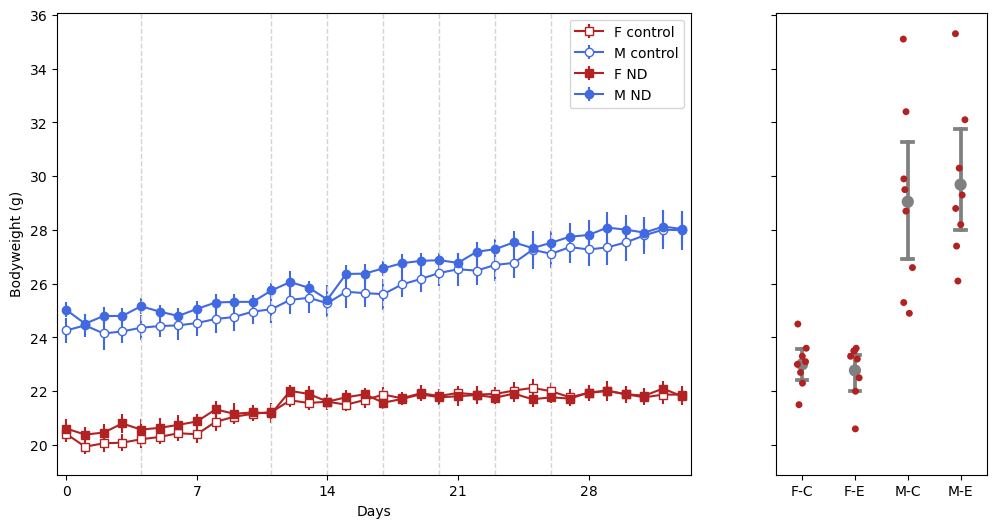

In [59]:
#now for only the first 34 days
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y = mean.query("sex == 'female' and group == 'control'").bodyweight[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight[:34],
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight[:34],
               marker="s", markerfacecolor="white", color="firebrick",
               label="F control")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight[:34],
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight[:34],
               marker="o", markerfacecolor="white", color="royalblue",
               label="M control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight[:34],
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight[:34],
               marker="s", markerfacecolor="firebrick", color="firebrick",
               label="F ND")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight[:34],
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight[:34],
               marker="o", markerfacecolor="royalblue", color="royalblue",
               label="M ND")

# Show when niacin levels are halved
vertical_lines_x = [4, 11, 14, 17, 20, 23, 26]
for x_value in vertical_lines_x:
    ax[0].axvline(x=x_value, color='lightgrey', linestyle='--', linewidth=1)

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 34, 7))

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["firebrick", "firebrick", "firebrick", "firebrick"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

f.savefig("..//results//bodyweight_niacin1_until_day_34.png")

In [11]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
1312,B3101,male,control,control,2024-04-05,0.0,25.3,39.7,33.7,3.00,51.7,46.4,2.65,2
1313,B3102,male,control,control,2024-04-05,0.0,24.9,42.8,37.6,2.60,52.0,46.6,2.70,2
1314,B3103,male,experimental,experimental,2024-04-05,0.0,26.1,33.4,28.5,2.45,52.0,47.1,2.45,3
1315,B3104,male,experimental,experimental,2024-04-05,0.0,35.3,41.8,35.8,3.00,50.2,46.1,2.05,3
1316,B3105,male,control,control,2024-04-05,0.0,32.4,41.6,36.2,2.70,51.8,47.6,2.10,2
1317,B3106,male,control,control,2024-04-05,0.0,35.1,47.0,39.7,3.65,51.2,45.7,2.75,2
1318,B3107,male,experimental,experimental,2024-04-05,1.0,30.3,28.9,24.3,2.30,51.5,47.8,1.85,3
1319,B3108,male,experimental,experimental,2024-04-05,1.0,29.3,30.4,24.5,2.95,51.9,47.7,2.10,3
1320,B3109,male,control,control,2024-04-05,0.0,28.7,37.3,31.8,2.75,52.0,47.9,2.05,2
1321,B3110,male,control,control,2024-04-05,0.0,29.9,45.2,39.6,2.80,52.1,47.8,2.15,2


In [12]:
today

'2024-04-05'

In [13]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [14]:
# try to skip days
# no idea how, tried for very long but nothing worked (CHATGPT didn't help at all)

In [15]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    
    print("the number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

the number of outliers being replaced for food_intake is 7
the number of outliers being replaced for water_intake is 5


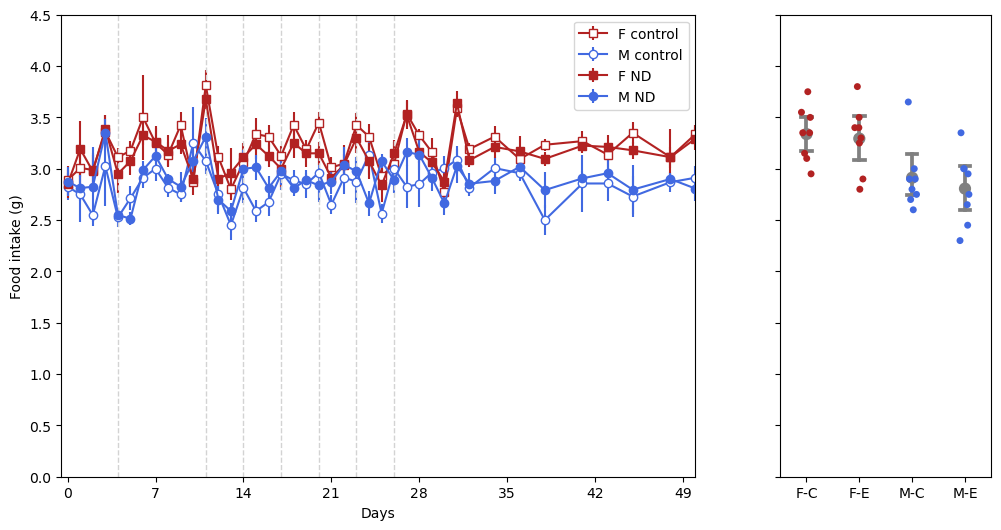

In [63]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").food_intake

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="s", markerfacecolor="white", color="firebrick",
               label="F control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="royalblue",
               label="M control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="s", markerfacecolor="firebrick", color="firebrick",
               label="F ND")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="royalblue", color="royalblue",
               label="M ND")

# Show when niacin levels are halved
vertical_lines_x = [4, 11, 14, 17, 20, 23, 26]
for x_value in vertical_lines_x:
    ax[0].axvline(x=x_value, color='lightgrey', linestyle='--', linewidth=1)

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,50])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["firebrick", "firebrick", "royalblue", "royalblue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


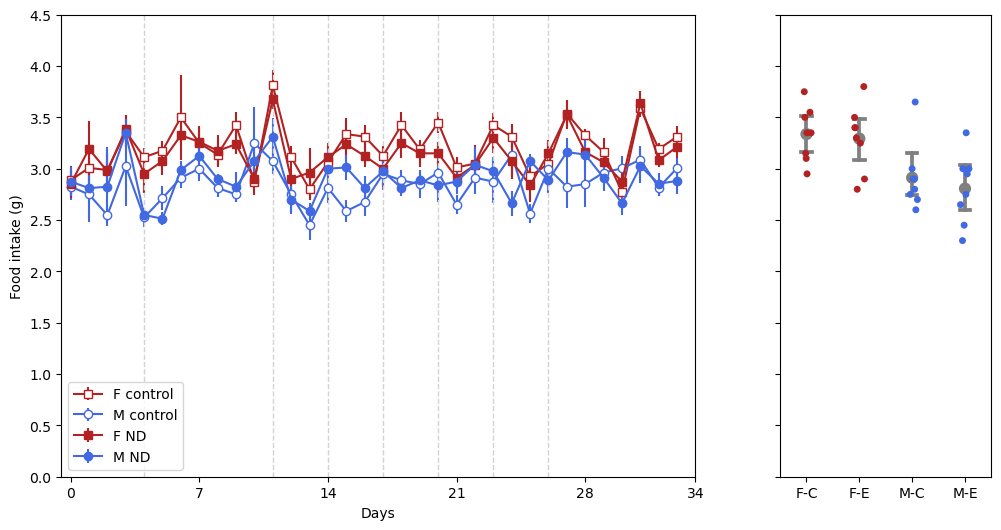

In [58]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(34)
y = mean.query("sex == 'female' and group == 'control'").food_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake[:34],
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake[:34],
               marker="s", markerfacecolor="white", color="firebrick",
               label="F control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake[:34],
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake[:34],
               marker="o", markerfacecolor="white", color="royalblue",
               label="M control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34],
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34],
               marker="s", markerfacecolor="firebrick", color="firebrick",
               label="F ND")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34],
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34],
               marker="o", markerfacecolor="royalblue", color="royalblue",
               label="M ND")

# Show when niacin levels are halved
vertical_lines_x = [4, 11, 14, 17, 20, 23, 26]
for x_value in vertical_lines_x:
    ax[0].axvline(x=x_value, color='lightgrey', linestyle='--', linewidth=1)

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,34])
ax[0].set_xticks([0,7,14,21,28,34])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend(loc="lower left")

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["firebrick", "firebrick", "royalblue", "royalblue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


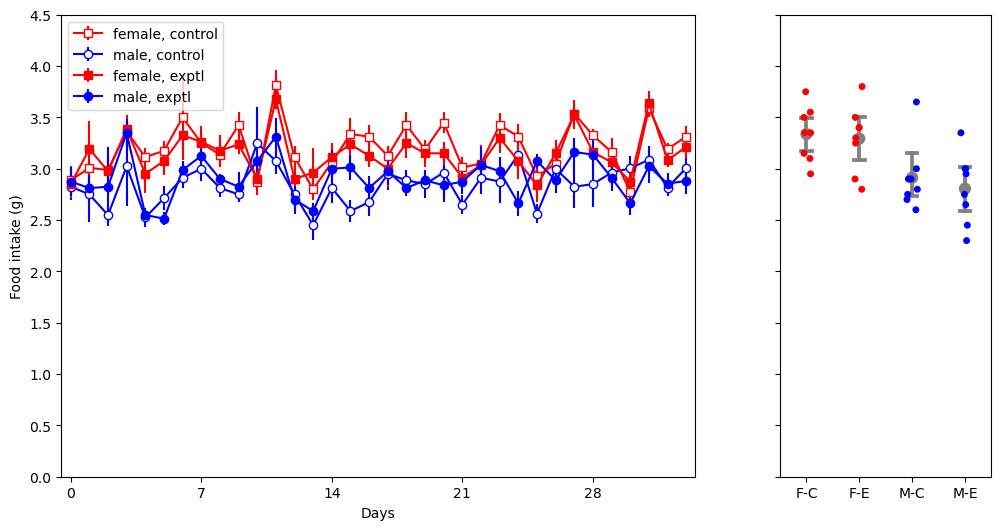

In [17]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y_female_control = mean_fw.query("sex == 'female' and group == 'control'").food_intake[:34]
y_male_control = mean_fw.query("sex == 'male' and group == 'control'").food_intake[:34]
y_female_experimental = mean_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34]
y_male_experimental = mean_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x, y_female_control,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake[:34],
               marker="s", markerfacecolor="white", color="red",
               label="female, control")

ax[0].errorbar(x, y_male_control,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake[:34],
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x, y_female_experimental,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake[:34],
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x, y_male_experimental,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake[:34],
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 34, 7))

ax[0].set_ylim([0, 4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df_food_water.date.max()
today_df = df_food_water.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()

f.savefig("../results/food_intake_niacin1_until_day_34.png")

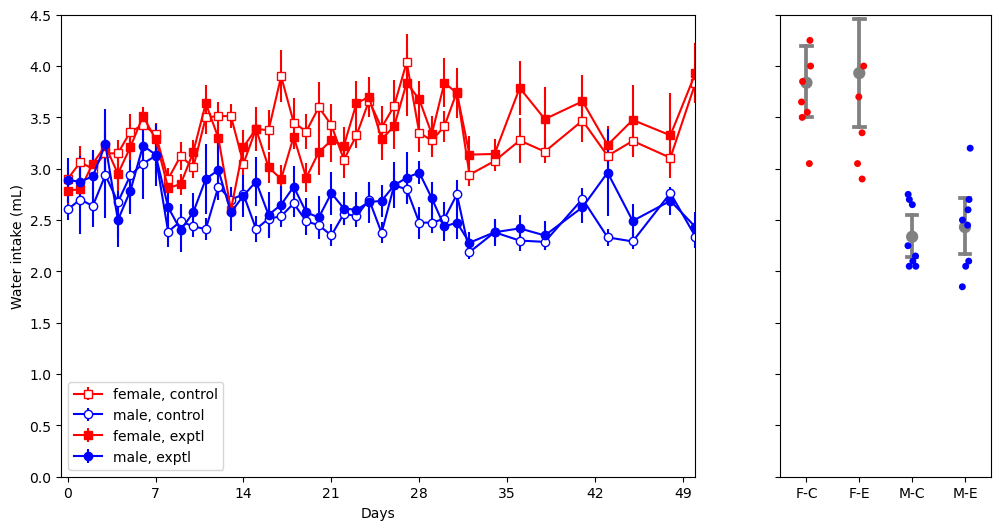

In [18]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))
x1 = list(np.arange(0,33,1)) 
x2 = [34,36,38,41,43,45,48,50]
x = x1 + x2
y = mean.query("sex == 'female' and group == 'control'").water_intake

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,50])
ax[0].set_xticks([0,7,14,21,28,35,42,49])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


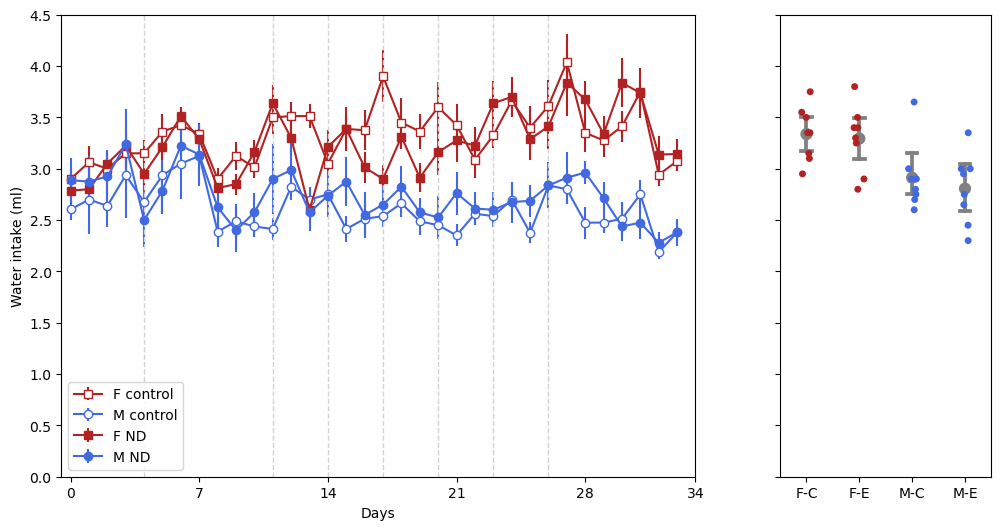

In [62]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(34)
y = mean.query("sex == 'female' and group == 'control'").water_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake[:34],
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake[:34],
               marker="s", markerfacecolor="white", color="firebrick",
               label="F control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake[:34],
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake[:34],
               marker="o", markerfacecolor="white", color="royalblue",
               label="M control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34],
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34],
               marker="s", markerfacecolor="firebrick", color="firebrick",
               label="F ND")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34],
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34],
               marker="o", markerfacecolor="royalblue", color="royalblue",
               label="M ND")

# Show when niacin levels are halved
vertical_lines_x = [4, 11, 14, 17, 20, 23, 26]
for x_value in vertical_lines_x:
    ax[0].axvline(x=x_value, color='lightgrey', linestyle='--', linewidth=1)

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,33])
ax[0].set_xticks([0,7,14,21,28,34])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (ml)")
ax[0].set_xlabel("Days")

ax[0].legend(loc="lower left")

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["firebrick", "firebrick", "royalblue", "royalblue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (ml)")
ax[1].legend().remove()


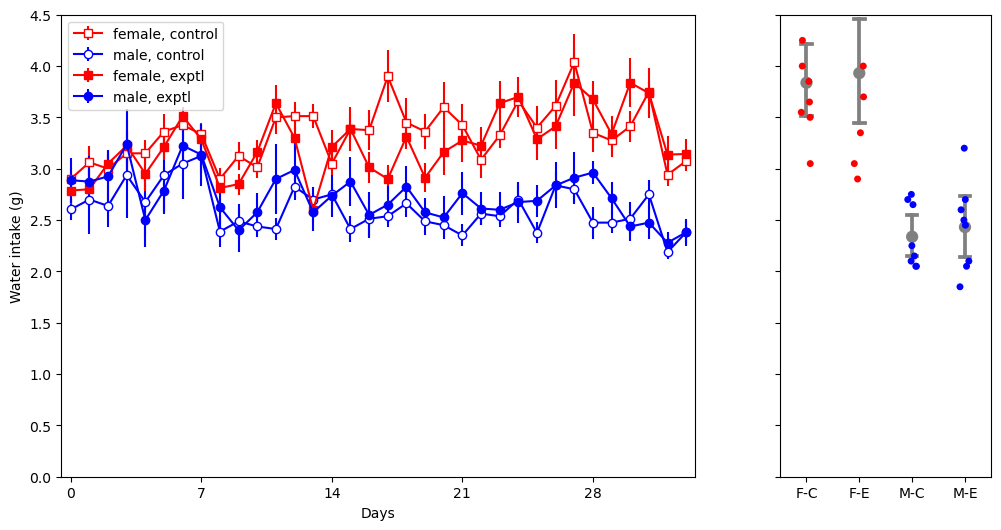

In [19]:
#now of only the first 34 days (before the split into groups)
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 1]})

# Set x values based on number of days
x = np.arange(34)
y_female_control = mean_fw.query("sex == 'female' and group == 'control'").water_intake[:34]
y_male_control = mean_fw.query("sex == 'male' and group == 'control'").water_intake[:34]
y_female_experimental = mean_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34]
y_male_experimental = mean_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34]

# Plot data for each group in first subplot
ax[0].errorbar(x, y_female_control,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake[:34],
               marker="s", markerfacecolor="white", color="red",
               label="female, control")

ax[0].errorbar(x, y_male_control,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake[:34],
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x, y_female_experimental,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake[:34],
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x, y_male_experimental,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake[:34],
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5, 33.5])
ax[0].set_xticks(np.arange(0, 34, 7))

ax[0].set_ylim([0, 4.5])

# Add labels
ax[0].set_ylabel("Water intake (g)")
ax[0].set_xlabel("Days")
ax[0].legend()

# Plot today's data in second subplot
today = df_food_water.date.max()
today_df = df_food_water.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (g)")
ax[1].legend().remove()

f.savefig("../results/water_intake_niacin1_until_day_34.png")

In [20]:
df.query("date == '2024-02-13'")

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
37,B3106,male,control,control,2024-02-13,0.0,26.4,52.5,49.3,3.2,51.0,48.5,2.5,2
38,B3107,male,experimental,control,2024-02-13,0.0,24.6,62.0,59.4,2.6,50.6,48.1,2.5,3
39,B3108,male,experimental,control,2024-02-13,0.0,26.0,57.7,54.6,3.1,50.7,48.4,2.3,3
40,B3109,male,control,control,2024-02-13,0.0,23.9,60.5,57.7,2.8,49.0,47,2.0,2
41,B3110,male,control,control,2024-02-13,0.0,24.2,65.2,62.8,2.4,50.4,47.9,2.5,2


In [21]:
df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-13,0.0,19.9375,77.4500,2.887500,51.5000,2.900365,0.0
1,female,control,2024-02-14,0.0,20.0625,74.5625,3.008385,51.2875,3.062500,0.0
2,female,control,2024-02-15,0.0,20.0875,71.6250,2.987500,51.5250,3.000000,0.0
3,female,control,2024-02-16,0.0,20.2125,72.7875,3.362500,51.7500,3.150000,0.0
4,female,control,2024-02-17,0.0,20.3000,69.4250,3.112500,48.6000,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...
159,male,experimental,2024-03-27,1.5,28.7500,52.0000,2.906250,44.7000,2.625000,3.0
160,male,experimental,2024-03-29,1.5,29.2500,46.1875,2.956250,51.7750,2.962500,3.0
161,male,experimental,2024-04-01,1.5,29.6500,45.6875,2.795833,45.8500,2.491667,3.0
162,male,experimental,2024-04-03,1.5,29.5875,37.3000,2.900000,44.6125,2.687500,3.0


In [22]:
mean_fw.query("sex == 'female' and group == 'control'").water_intake
sem_fw.query("sex == 'female' and group == 'control'").water_intake

0     0.103762
1     0.155767
2     0.147600
3     0.098198
4     0.126773
5     0.170018
6     0.045316
7     0.086474
8     0.105221
9     0.135949
10    0.102535
11    0.161466
12    0.141973
13    0.120175
14    0.118019
15    0.218303
16    0.194340
17    0.253546
18    0.238298
19    0.168965
20    0.241276
21    0.204197
22    0.179720
23    0.127825
24    0.143847
25    0.213809
26    0.250312
27    0.275122
28    0.185164
29    0.157831
30    0.149329
31    0.101770
32    0.111936
33    0.096362
34    0.218559
35    0.108379
36    0.210216
37    0.116113
38    0.160163
39    0.129710
40    0.192435
Name: water_intake, dtype: float64

In [23]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph

#I'm not really sure what happens in the following cells: 
#It seems like it's double?

In [24]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
            
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

# replace_outliers(df, "food_intake")

In [25]:
df_food_water

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.50,50.9,48.3,2.60,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.80,50.4,47.7,2.70,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.60,50.5,48,2.50,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.80,50.5,48,2.50,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.70,50.9,48.2,2.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,B3128,female,experimental,experimental,2024-04-05,0.0,23.6,41.3,34.5,3.40,44.7,35.4,4.65,1
1340,B3129,female,control,control,2024-04-05,0.0,23.3,39.2,32.2,3.50,46.4,38.7,3.85,0
1341,B3130,female,control,control,2024-04-05,0.0,24.5,40.7,34,3.35,44.2,36.9,3.65,0
1342,B3131,female,experimental,experimental,2024-04-05,0.0,23.5,38.3,31.3,3.50,44.2,38.1,3.05,1


In [26]:
a = np.nan
np.isnan(a)

True

In [27]:
df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

,animal_id,niacin,bodyweight,food_yesterday,food_intake,water_yesterday,water_intake,groupn
0,B3101,0.000000,24.040476,53.578571,2.650397,46.014286,2.313492,2.0
1,B3102,0.000000,25.204762,51.838095,2.622222,46.528571,2.542063,2.0
2,B3103,7.107143,24.730952,47.659524,2.612302,47.157143,2.456746,3.0
3,B3104,7.107143,28.352381,47.283333,2.913889,47.509524,2.260317,3.0
4,B3105,0.000000,28.745238,50.526190,2.931349,46.211905,2.703968,2.0
5,B3106,0.000000,29.000000,50.909524,2.970635,46.461905,2.488095,2.0
6,B3107,7.321429,27.428571,48.742857,2.664286,47.490476,2.198016,3.0
7,B3108,7.321429,27.102381,49.904762,2.721032,47.580952,2.132143,3.0
8,B3109,0.000000,26.440476,51.290476,2.753175,46.695238,2.253175,2.0
9,B3110,0.000000,26.307143,51.121429,2.653571,46.683333,2.215873,2.0


**Getting a dataframe so that statistics can be done**

In [28]:
#pivoting dataframe
df_pivot = df_food_water.pivot(index='animal_id', columns='date', values='bodyweight').reset_index() 

In [29]:
#WHY IS THIS NOT WORKING?????????????????????????????????????????????????????????????????????????????????????????????????????????????///
#?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????
#???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [30]:
df_pivot = df_pivot.assign(sex = ['male','male','male','male','male','male','male','male','male','male','male','male','male',
                                 'male','male','male','female','female','female','female','female','female','female','female','female','female',
                                 'female','female','female','female','female','female',])
df_pivot = df_pivot.assign(group = ['control','control','experimental','experimental','control','control','experimental','experimental',
                                   'control','control','experimental','experimental','control','control','experimental','experimental',
                                   'control','control','experimental','experimental','control','control','experimental','experimental',
                                   'control','control','experimental','experimental','control','control','experimental','experimental',])

In [31]:
df_pivot.head()

date,animal_id,2024-02-13,2024-02-14,2024-02-15,2024-02-16,2024-02-17,2024-02-18,2024-02-19,2024-02-20,2024-02-21,...,2024-03-20,2024-03-22,2024-03-25,2024-03-27,2024-03-29,2024-04-01,2024-04-03,2024-04-05,sex,group
0,B3101,22.4,20.8,21.8,21.9,21.9,21.4,21.9,21.9,21.8,...,27.7,27.3,26.1,24.6,24.6,24.6,25.0,25.3,male,control
1,B3102,24.5,23.7,24.4,24.2,24.2,24.1,24.1,24.5,24.7,...,26.4,26.6,25.9,25.6,25.4,25.2,24.0,24.9,male,control
2,B3103,23.2,23.4,23.3,23.4,23.6,23.5,23.3,23.5,23.5,...,25.9,26.6,25.3,25.3,25.8,26.3,25.9,26.1,male,experimental
3,B3104,24.9,24.3,25.1,25.4,24.9,25.0,25.1,25.2,25.7,...,30.7,31.1,33.5,33.2,34.3,34.9,35.3,35.3,male,experimental
4,B3105,25.6,25.6,25.4,26.4,25.8,26.3,26.4,26.4,26.4,...,30.9,31.6,31.2,32.1,32.8,32.6,32.5,32.4,male,control


In [32]:
non_date_columns = ['animal_id','sex','group']
date_columns = df_pivot.columns.difference(non_date_columns)
df_pivot[date_columns] = df_pivot[date_columns].apply(pd.to_datetime, errors='coerce')

In [33]:
## statistical tests to verify what we already can observe by eye?
# bin averages and do then a repeated measures ANOVA
bw_baseline = [pd.Timestamp('2024-02-13'), pd.Timestamp('2024-02-14'), pd.Timestamp('2024-02-15')]
bw_30 = [pd.Timestamp('2024-02-16'), pd.Timestamp('2024-02-17'), pd.Timestamp('2024-02-18'), pd.Timestamp('2024-02-19'), pd.Timestamp('2024-02-20'),
        pd.Timestamp('2024-02-21'), pd.Timestamp('2024-02-22')]
bw_15 = [pd.Timestamp('2024-02-23'), pd.Timestamp('2024-02-24'), pd.Timestamp('2024-02-25')]
bw_7 = [pd.Timestamp('2024-02-26'), pd.Timestamp('2024-02-27'), pd.Timestamp('2024-02-28')]
bw_4 = [pd.Timestamp('2024-02-29'), pd.Timestamp('2024-03-01'), pd.Timestamp('2024-03-02')]
bw_2 = [pd.Timestamp('2024-03-03'), pd.Timestamp('2024-03-04'), pd.Timestamp('2024-03-05')]
bw_1 = [pd.Timestamp('2024-03-06'), pd.Timestamp('2024-03-07'), pd.Timestamp('2024-03-08')]
bw_0 = [pd.Timestamp('2024-03-09'), pd.Timestamp('2024-03-10'), pd.Timestamp('2024-03-11'), pd.Timestamp('2024-03-12'),
       pd.Timestamp('2024-03-13'), pd.Timestamp('2024-03-14'), pd.Timestamp('2024-03-15')]

In [34]:
bw_baseline

[Timestamp('2024-02-13 00:00:00'),
 Timestamp('2024-02-14 00:00:00'),
 Timestamp('2024-02-15 00:00:00')]

In [35]:


#okay so this is the part that is not working
df_pivot['avg_bw_baseline'] = df_pivot[bw_baseline].mean(axis=1)
df_pivot['avg_bw_30'] = df_pivot[bw_30].mean(axis=1)
df_pivot['avg_bw_15'] = df_pivot[bw_15].mean(axis=1)
df_pivot['avg_bw_7'] = df_pivot[bw_7].mean(axis=1)
df_pivot['avg_bw_4'] = df_pivot[bw_4].mean(axis=1)
df_pivot['avg_bw_2'] = df_pivot[bw_2].mean(axis=1)
df_pivot['avg_bw_1'] = df_pivot[bw_1].mean(axis=1)
df_pivot['avg_bw_0'] = df_pivot[bw_0].mean(axis=1)

KeyError: "None of [DatetimeIndex(['2024-02-13', '2024-02-14', '2024-02-15'], dtype='datetime64[ns]', name='date', freq=None)] are in the [columns]"

In [ ]:
# import it as a .csv file
df_pivot.to_csv("..//results//experiment_1.csv")

**Displaying all individual's body weight and food and water intake**

In [ ]:
df.columns

# Pooling male and female data together

body weight

In [ ]:
# Find mean and SEM
mean = df_food_water.groupby(["group", "date"]).mean(numeric_only=True).reset_index()
sem = df_food_water.groupby(["group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x_control = np.arange(len(mean.query("group == 'control'")))
x_experimental = np.arange(len(mean.query("group == 'experimental'")))

# Plot data for each group in first subplot
ax[0].errorbar(x_control,
               mean.query("group == 'control'").bodyweight,
               yerr=sem.query("group == 'control'").bodyweight,
               marker="s", markerfacecolor="green", color="green",
               label="control"
               )

ax[0].errorbar(x_experimental,
               mean.query("group == 'experimental'").bodyweight,
               yerr=sem.query("group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="purple", color="purple",
               label="experimental"
               )

# Set limits and ticks
ax[0].set_xlim([-0.5, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))) - 0.5])
ax[0].set_xticks(np.arange(0, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))), 7))
ax[0].set_xlabel("Days")

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today").copy() #I was given a warning so this line should be there to prevent it?

palette = {"control": "green", "experimental": "purple"}

# again this line is to prevent a warning
today_df.loc[:, "group_index"] = today_df.groupby("group").ngroup()

sns.stripplot(data=today_df, x="group_index", y="bodyweight", hue="group", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x="group_index", y="bodyweight", hue="group", capsize=.2, palette=palette, markers='o', join=False, ax=ax[1])
ax[0].set_ylim([20, df['bodyweight'].max() + 1])

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Control", "Experimental"]) 
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()


food intake

In [ ]:
# Find mean and SEM
mean = df_food_water.groupby(["group", "date"]).mean(numeric_only=True).reset_index()
sem = df_food_water.groupby(["group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x_control = np.arange(len(mean.query("group == 'control'")))
x_experimental = np.arange(len(mean.query("group == 'experimental'")))

# Plot data for each group in first subplot
ax[0].errorbar(x_control,
               mean.query("group == 'control'").food_intake,
               yerr=sem.query("group == 'control'").food_intake,
               marker="s", markerfacecolor="green", color="green",
               label="control"
               )

ax[0].errorbar(x_experimental,
               mean.query("group == 'experimental'").food_intake,
               yerr=sem.query("group == 'experimental'").food_intake,
               marker="o", markerfacecolor="purple", color="purple",
               label="experimental"
               )

# Set limits and ticks
ax[0].set_xlim([-0.5, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))) - 0.5])
ax[0].set_xticks(np.arange(0, max(len(mean.query("group == 'control'")), len(mean.query("group == 'experimental'"))), 7))
ax[0].set_xlabel("Days")

# Add labels
ax[0].set_ylabel("Food intake / day (g)")
ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today").copy() #I was given a warning so this line should be there to prevent it?

palette = {"control": "green", "experimental": "purple"}

# again this line is to prevent a warning
today_df.loc[:, "group_index"] = today_df.groupby("group").ngroup()

sns.stripplot(data=today_df, x="group_index", y="food_intake", hue="group", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x="group_index", y="food_intake", hue="group", capsize=.2, palette=palette, markers='o', join=False, ax=ax[1])

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Control", "Experimental"]) 
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake / day (g)")
ax[1].legend().remove()


Water intake

# Graphs after split

In [ ]:
## trying to do this but then the groups split later

## first creating the new groups
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 1.0:
        return 1
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 5.0:
        return 2
    elif row['sex'] == 'female' and row['group'] == 'experimental' and row['niacin'] == 0.0:
        return 3
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 4
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 1.0:
        return 5
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 0.0:
        return 6
    elif row['sex'] == 'male' and row['group'] == 'experimental' and row['niacin'] == 5.0:
        return 7
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df_split = tweak_df(pd.DataFrame(rows, columns=header)) #stored in a different df to not mess up the rest 

In [ ]:
df_split.head()

In [ ]:
df_end = df_split.tail(288)
df_end